In [1]:
!python -m venv my_env

In [2]:
import numpy as np
import pandas as pd
import datatable as dt
from datatable import f
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification

import scipy
import statsmodels
import keras
import nltk
import torch
import tensorflow
import pipe
import pprint
import random

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\kevin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\kevin\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\kevin\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\kevin\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\kevin\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\kevin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\kevin\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\kevin\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\kevin\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\kevin\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

# Load the data and make initial checks

In [4]:
cancer_dataset = pd.read_csv('Breast_cancer_dataset.csv')

## Inspect the columns

In [5]:
print(cancer_dataset.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [6]:
cancer_dataset.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


## Check for duplicates

In [7]:
np.mean(cancer_dataset == cancer_dataset.drop_duplicates())

np.float64(0.9696969696969697)

In [8]:
cancer_dataset.duplicated().mean()

np.float64(0.0)

# Checking the distributions of the various features

## Creating the train/test split

In [16]:
random.seed(55)
cancer_dt = dt.Frame(cancer_dataset)

X = cancer_dt[:, ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
                    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
                    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 
                    'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
                    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 
                    'symmetry_worst', 'fractal_dimension_worst']]
y = cancer_dt[:, f.diagnosis]
original_indices = np.arange(len(cancer_dataset))

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, original_indices, test_size=0.2, random_state=55)
X_train_df = X_train.to_pandas()
X_train_df['diagnosis'] = y_train.to_pandas()

## Checking the boxplots of each feature, stratified by diagnosis

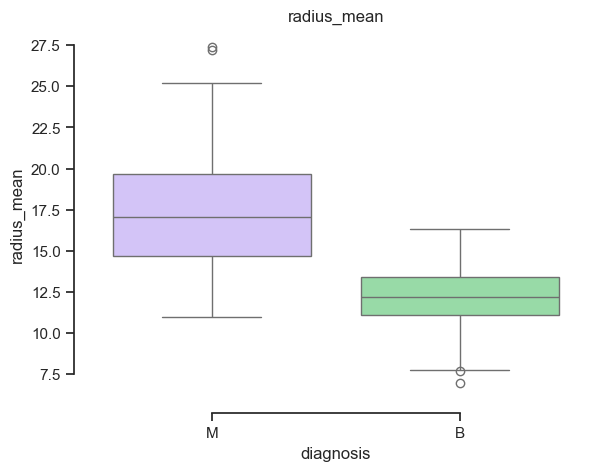

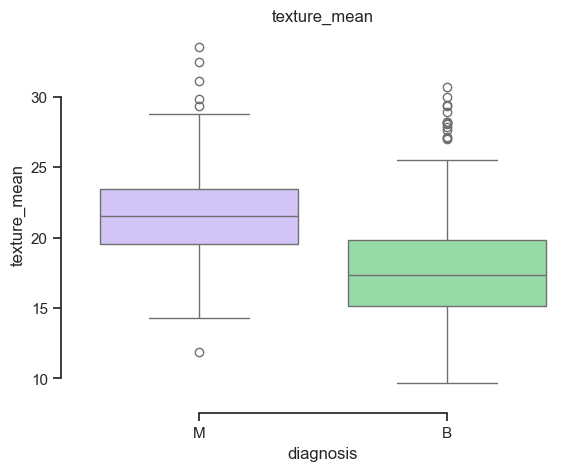

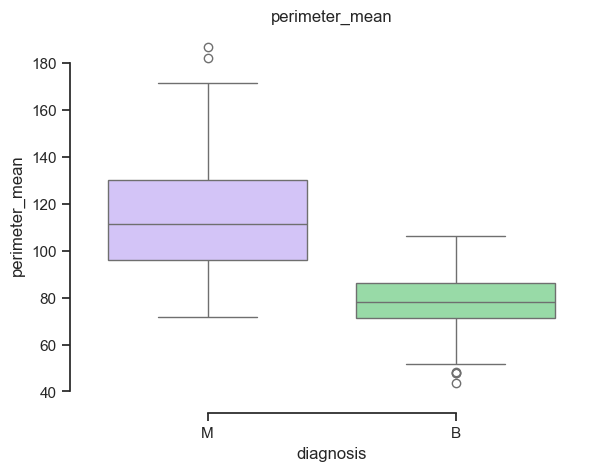

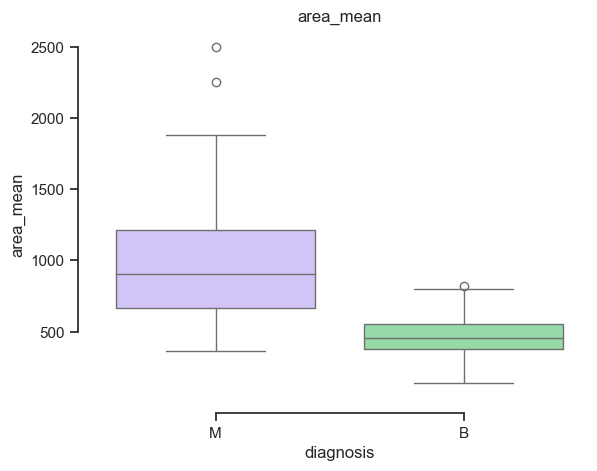

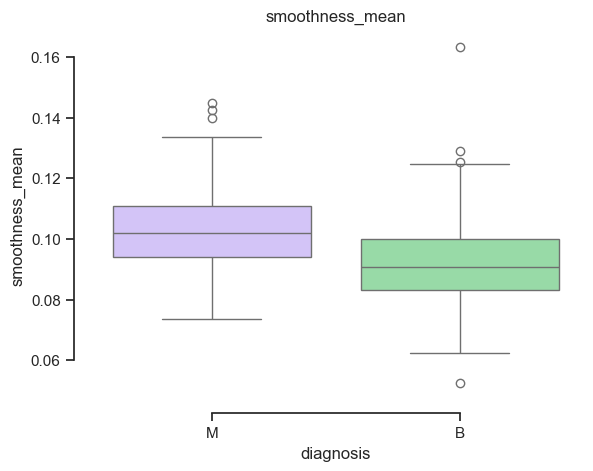

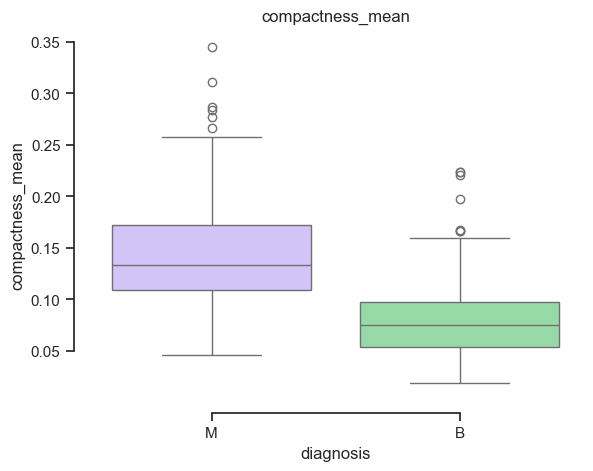

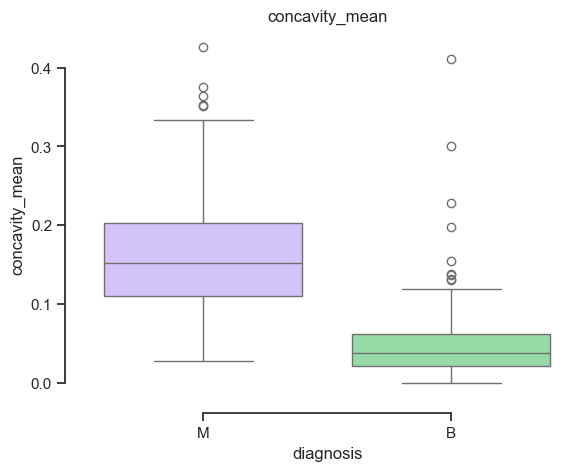

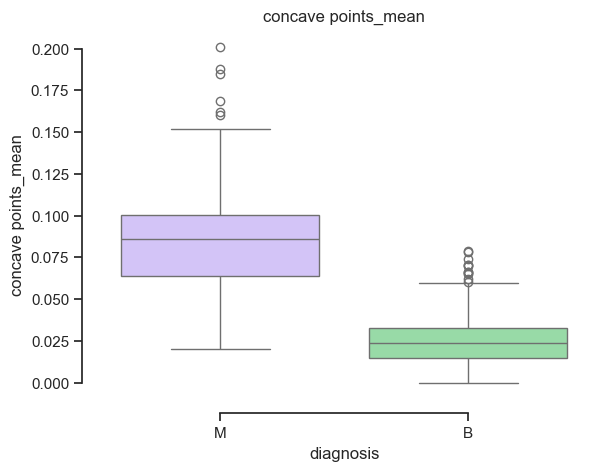

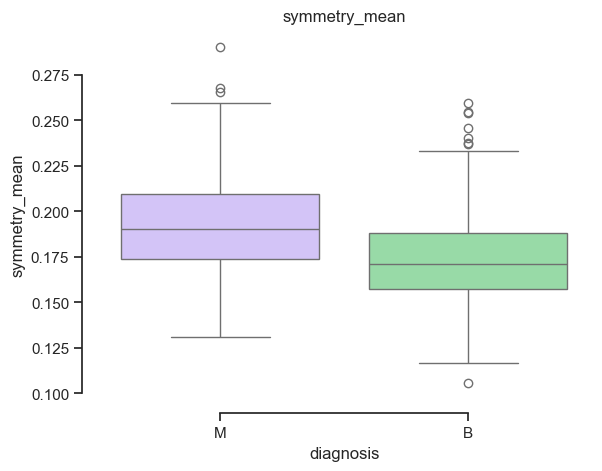

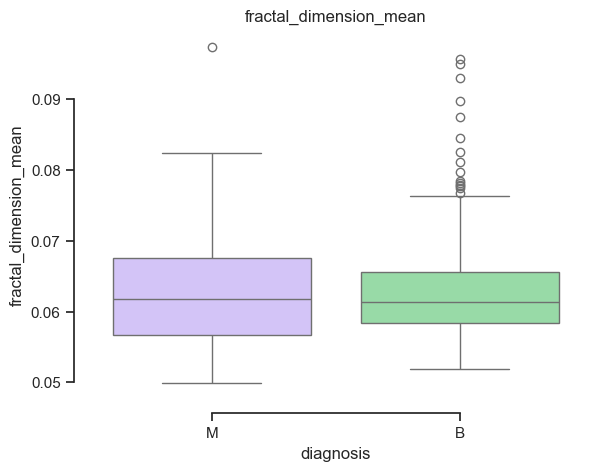

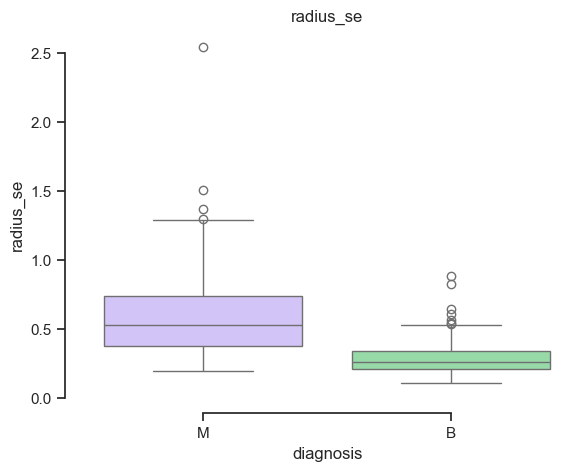

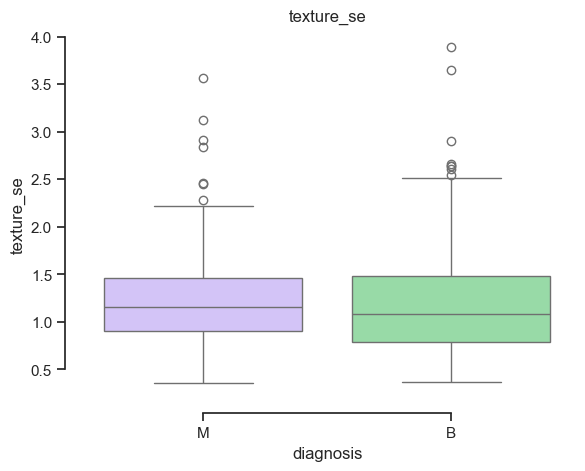

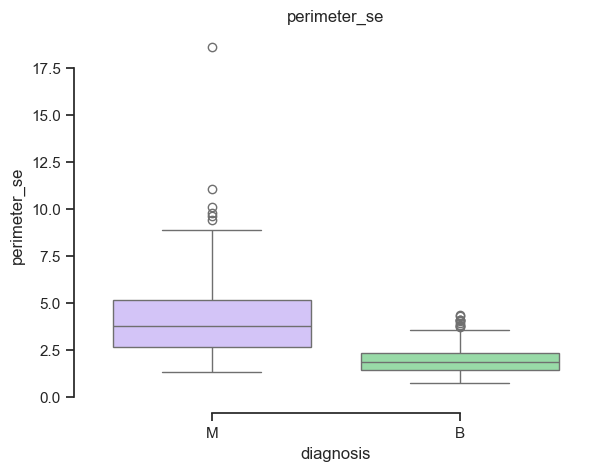

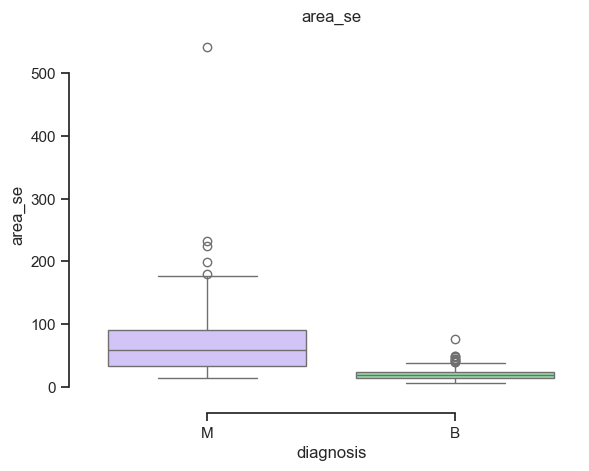

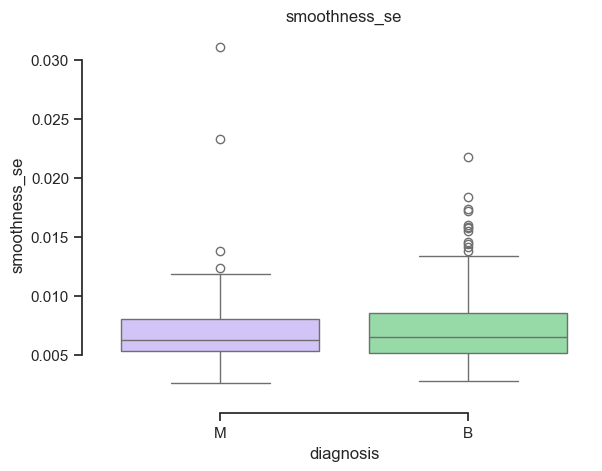

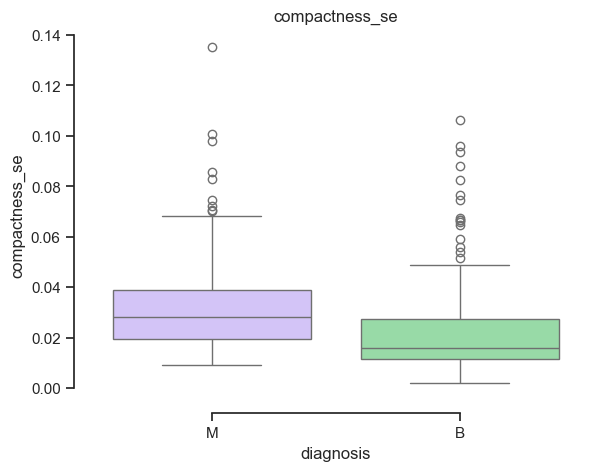

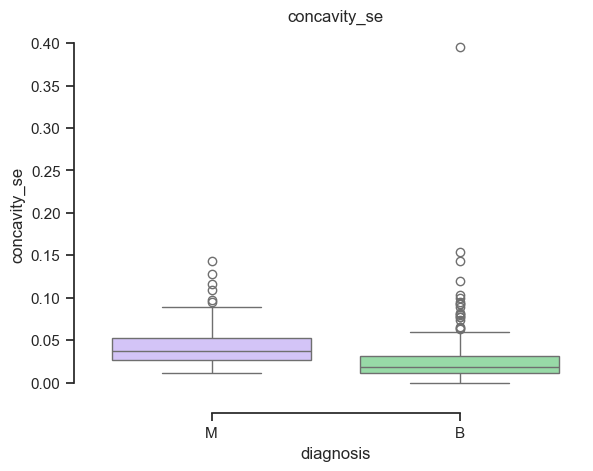

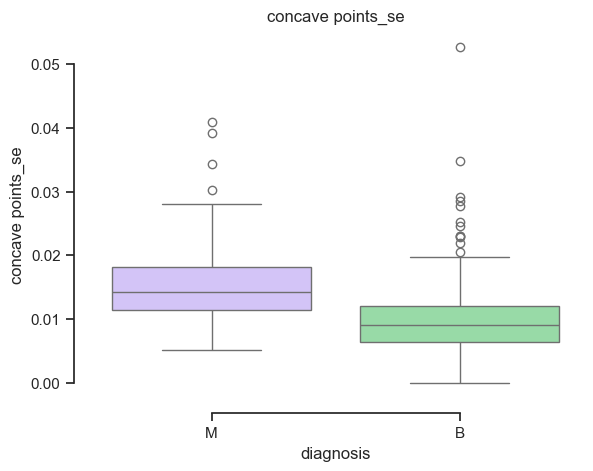

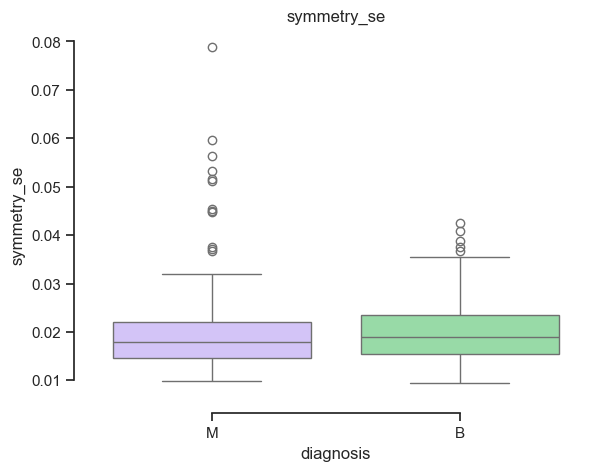

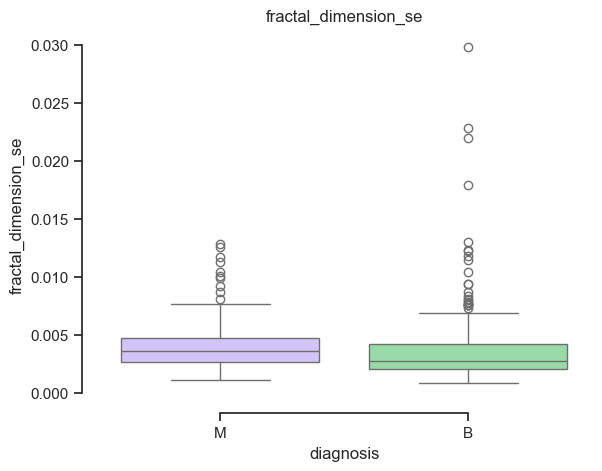

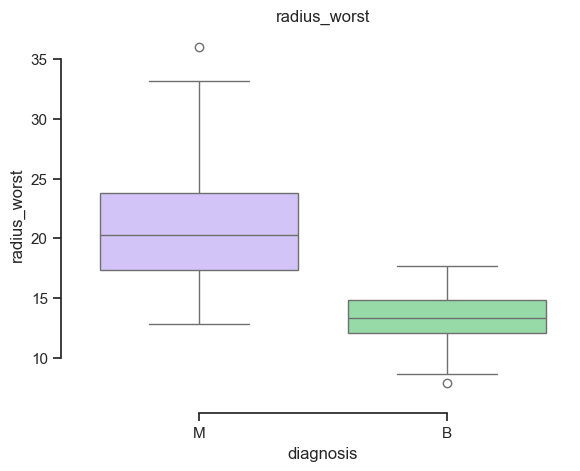

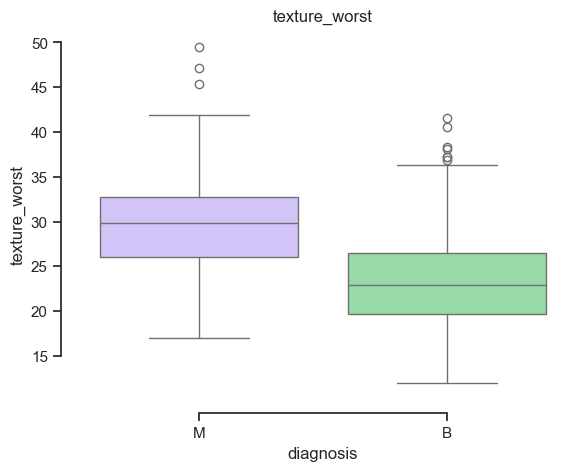

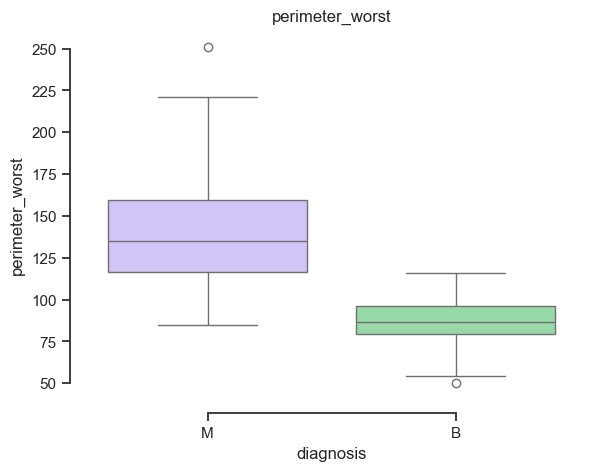

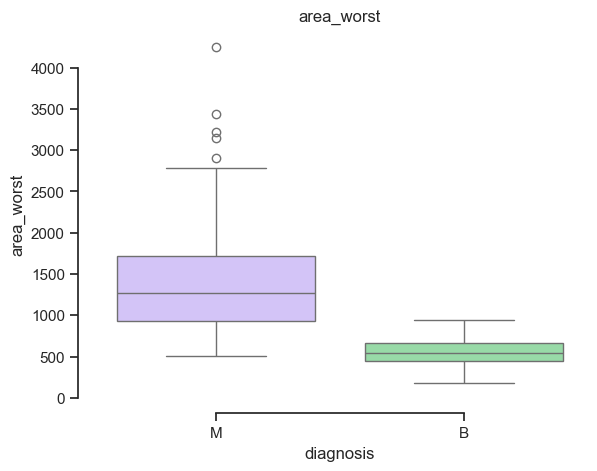

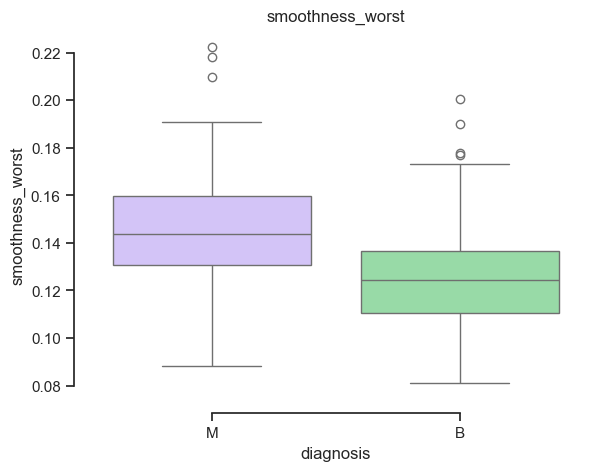

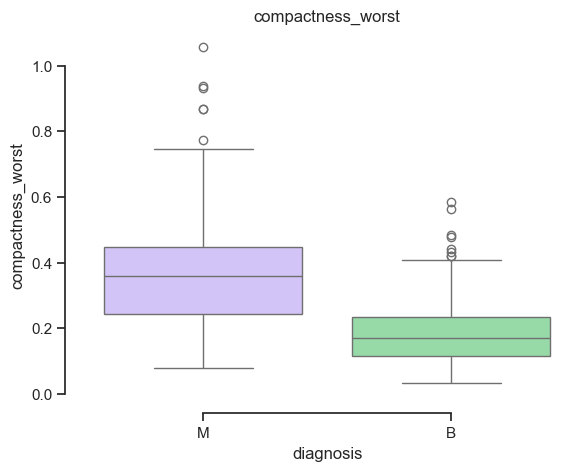

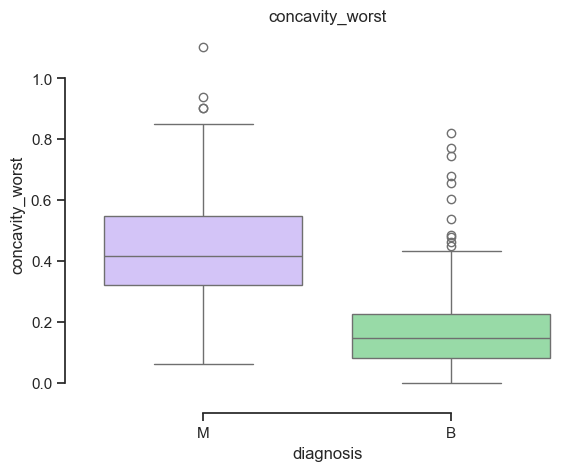

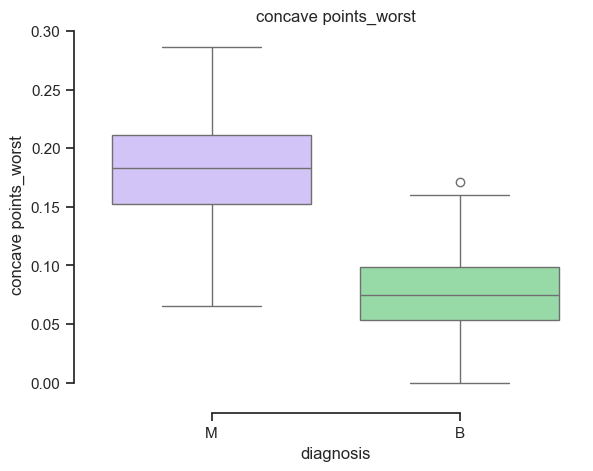

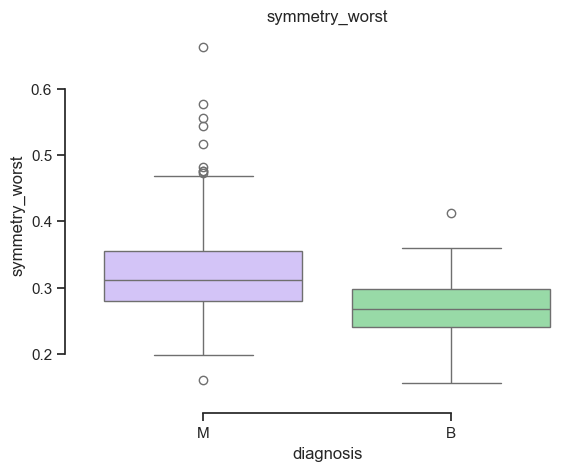

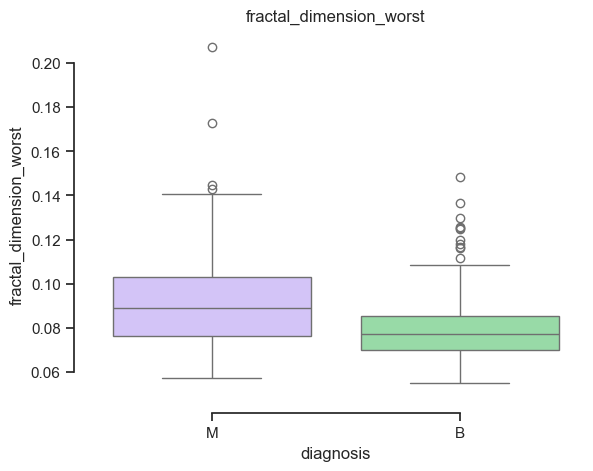

In [10]:
sns.set_theme(style="ticks", palette="pastel")
input_columns = X_train_df.columns[:-1]

for col in input_columns:
# Draw a nested boxplot to show bills by day and time
    sns.boxplot(x="diagnosis", y=col,
                hue="diagnosis", palette=["m", "g"],
                data=X_train_df)
    sns.despine(offset=10, trim=True)
    plt.title(f"{col}")
    plt.show()

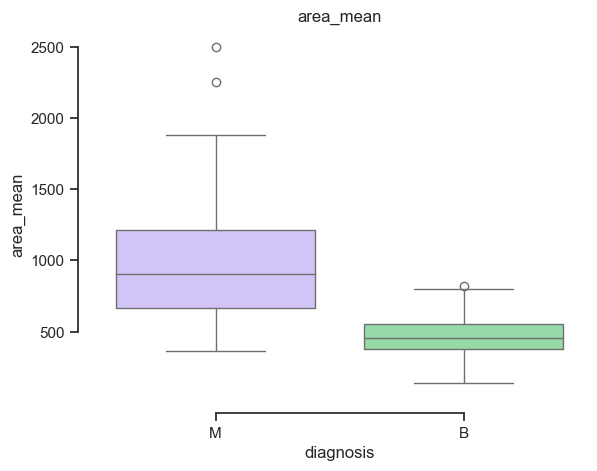

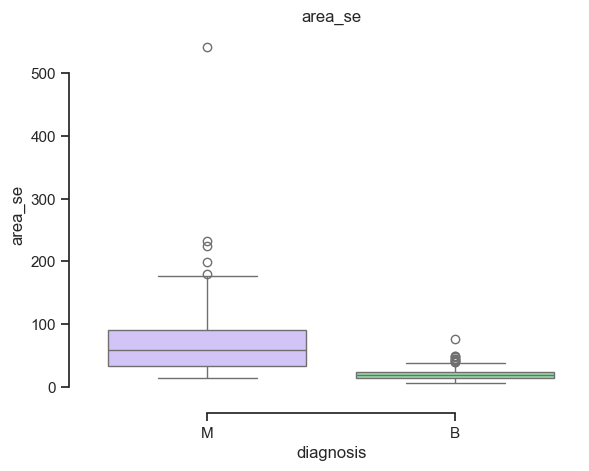

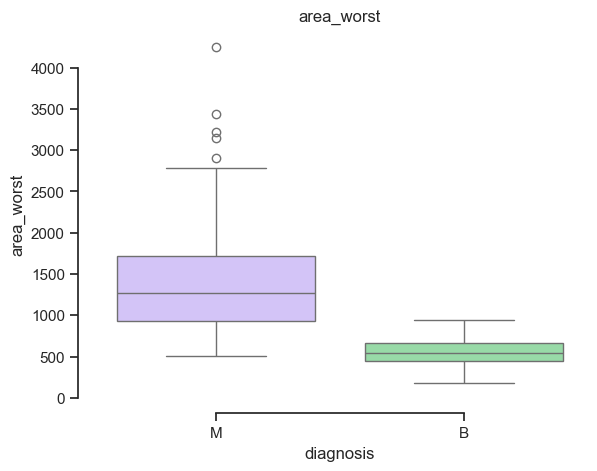

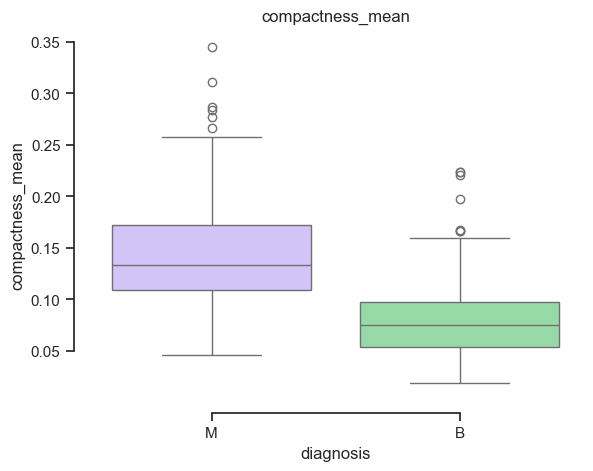

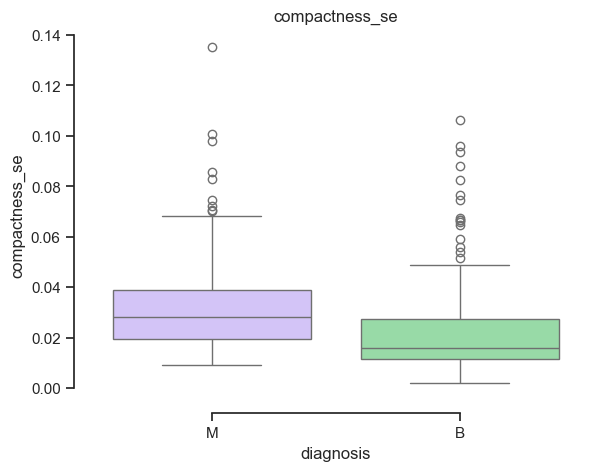

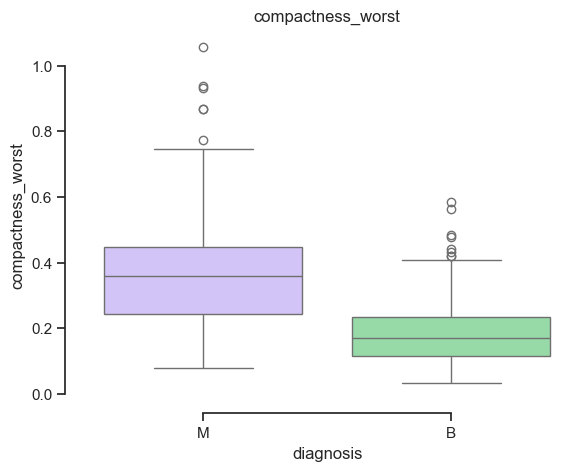

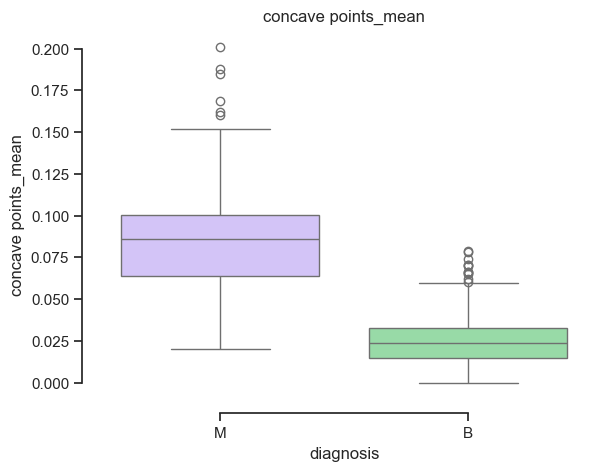

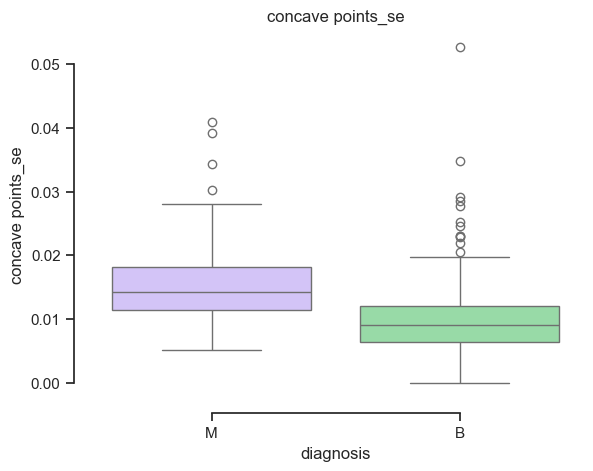

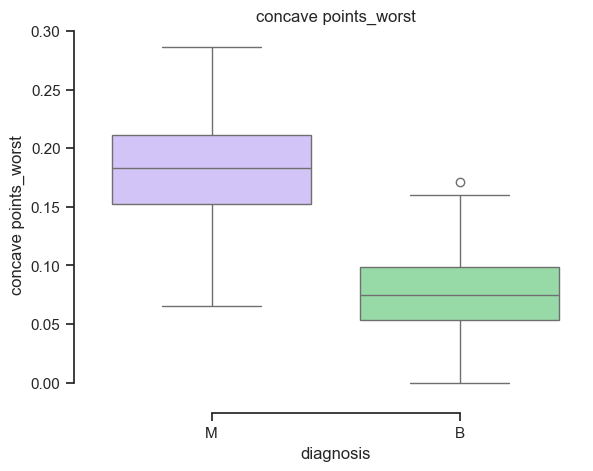

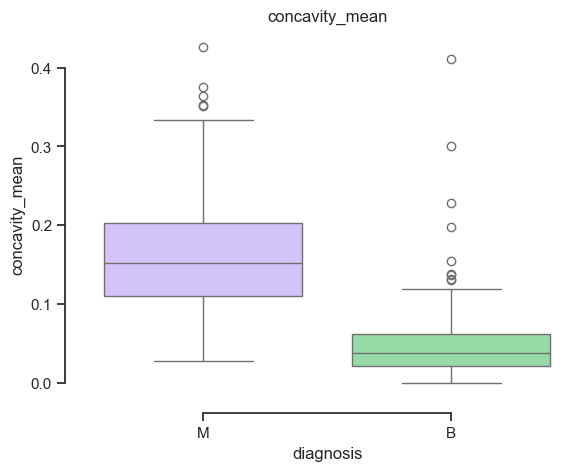

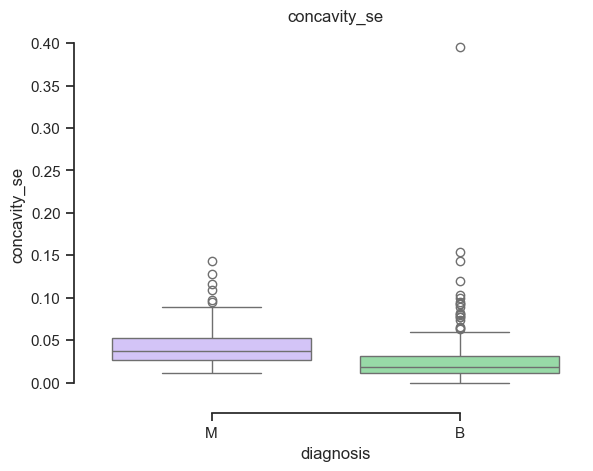

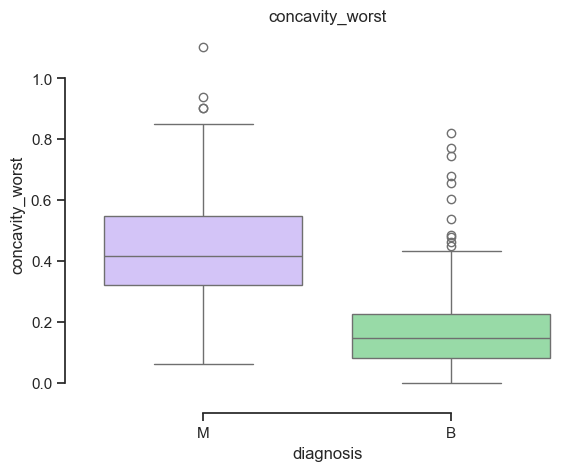

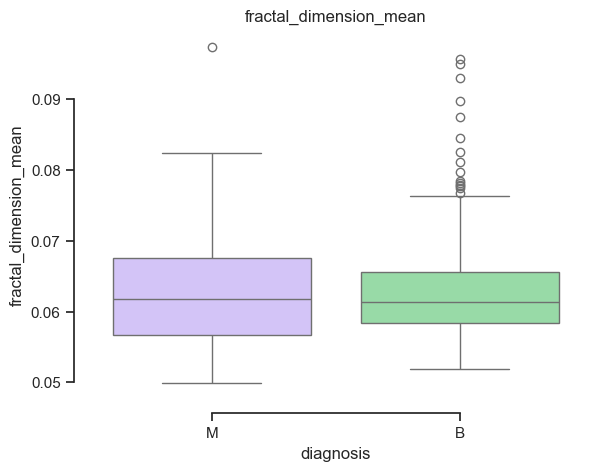

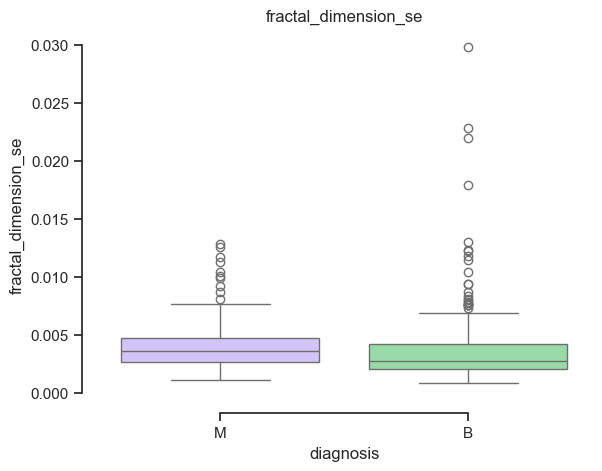

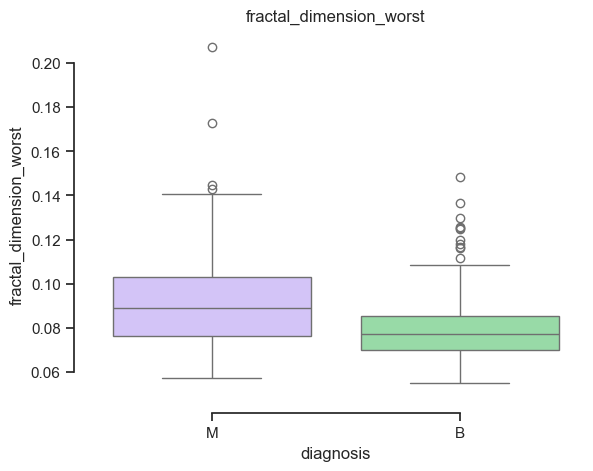

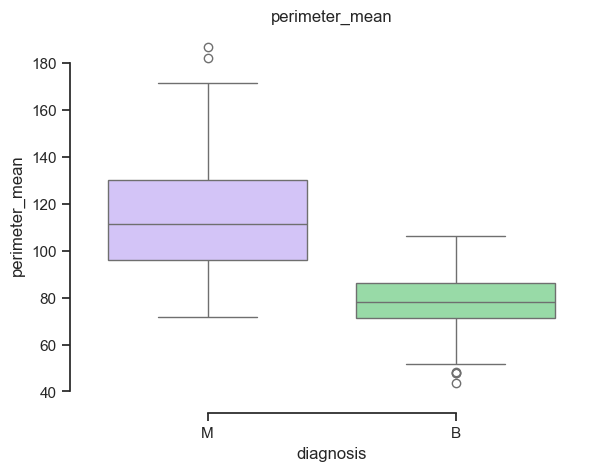

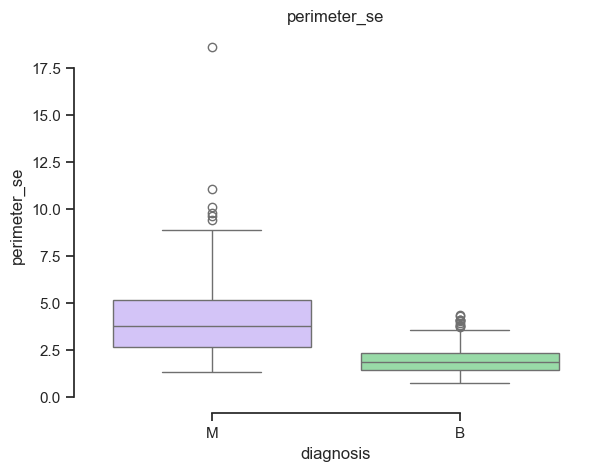

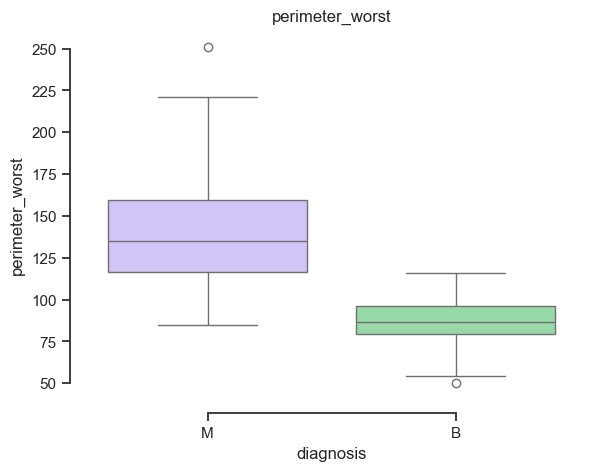

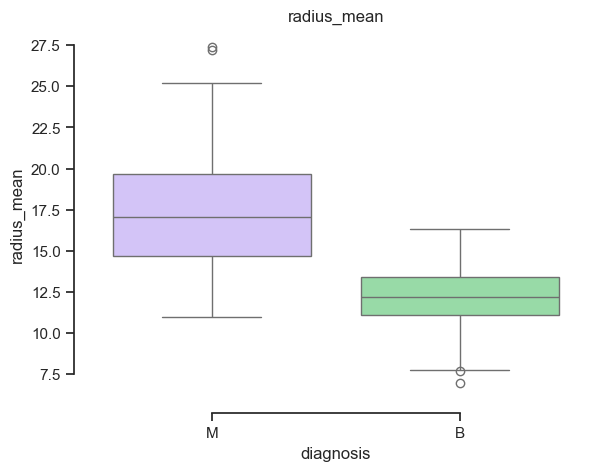

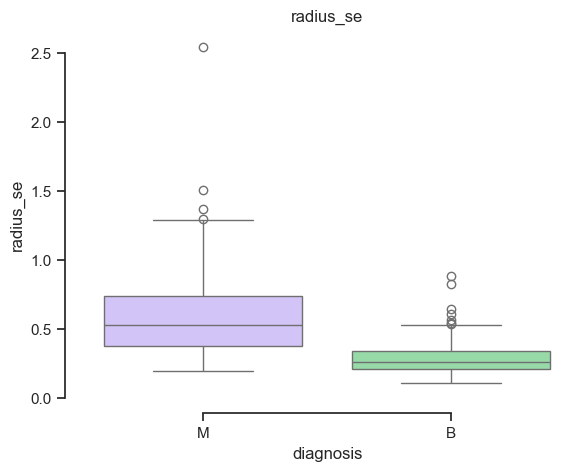

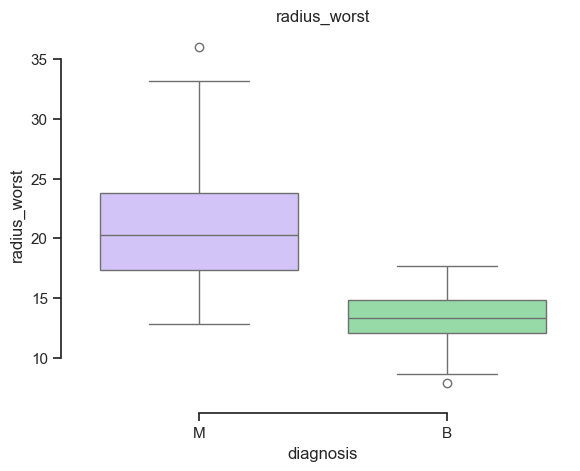

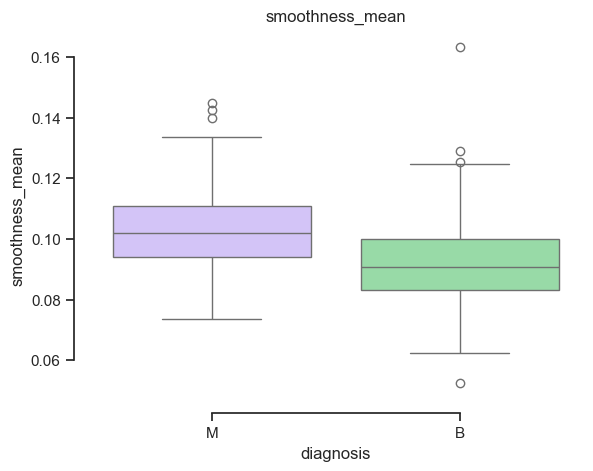

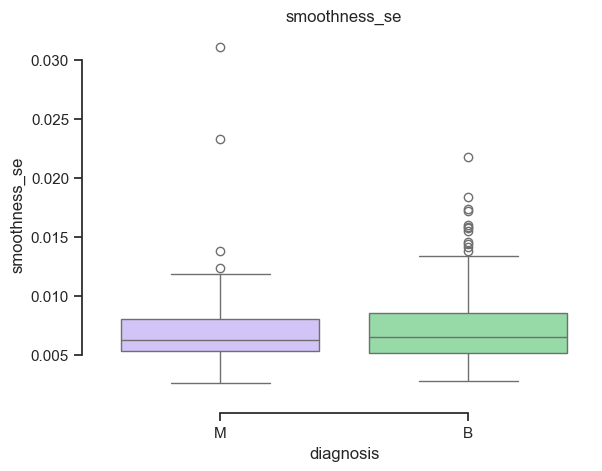

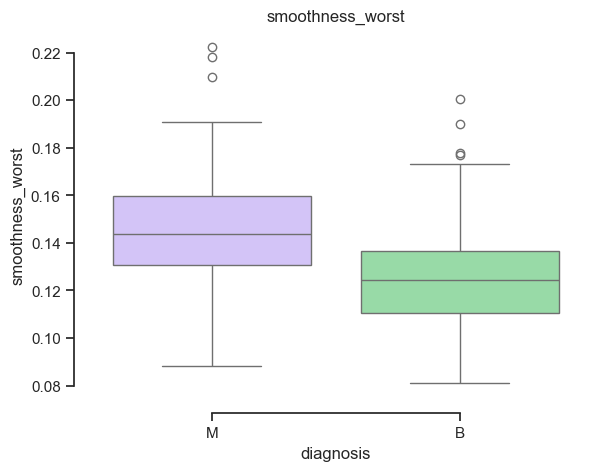

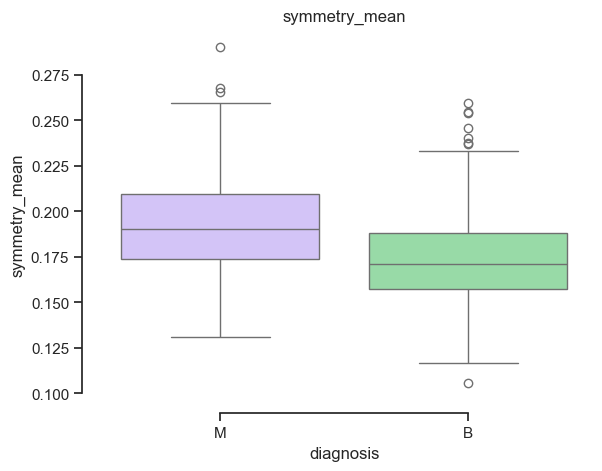

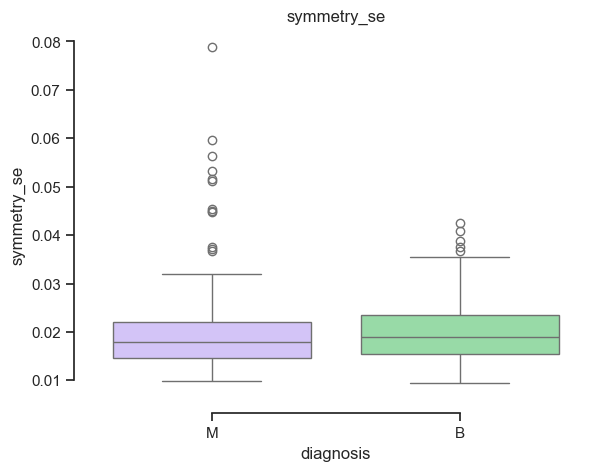

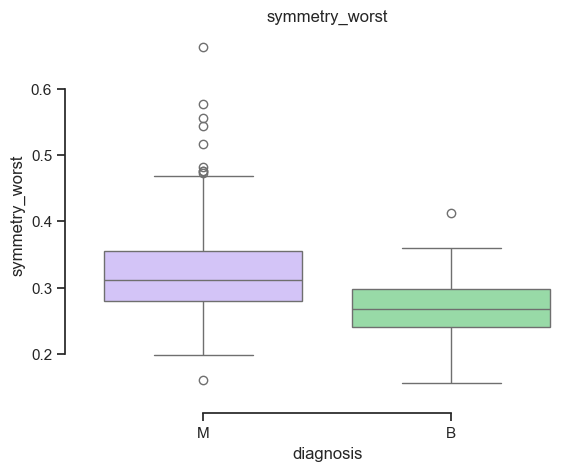

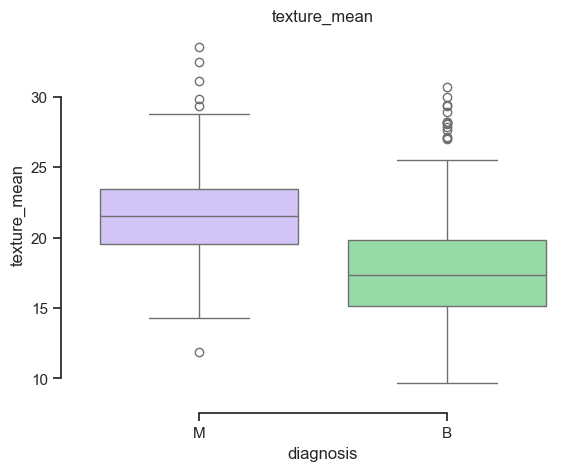

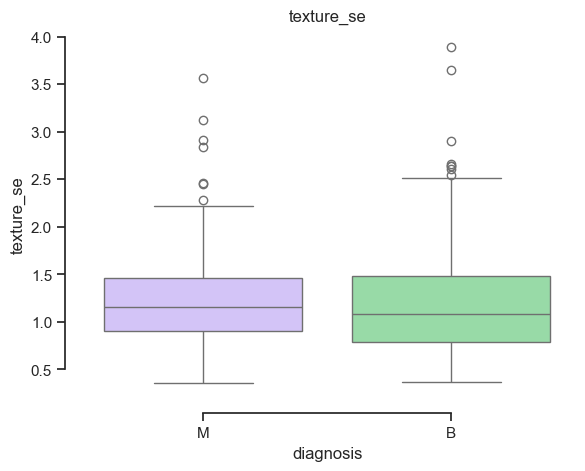

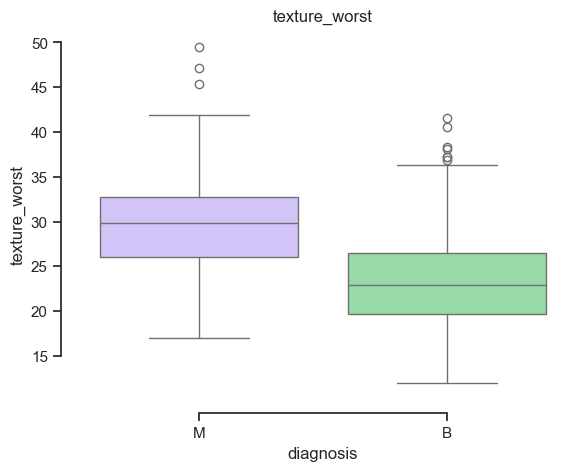

In [11]:
sns.set_theme(style="ticks", palette="pastel")
input_columns = X_train_df.columns[:-1].tolist()
input_columns.sort()

for col in input_columns:
# Draw a nested boxplot to show bills by day and time
    sns.boxplot(x="diagnosis", y=col,
                hue="diagnosis", palette=["m", "g"],
                data=X_train_df)
    sns.despine(offset=10, trim=True)
    plt.title(f"{col}")
    plt.show()

Seems most of the standard error measurements don't provide much insight on the nature of the tumor, so we'll train a model without those features

# Training and testing the model

In [14]:
columns_for_model = [col for col in input_columns if not '_se' in col]

random.seed(55)
model = RandomForestClassifier(n_estimators=100, random_state=55)
model.fit(X_train[:, columns_for_model], y_train)
predictions = model.predict(X_test[:, columns_for_model],)
prediction_probs = model.predict_proba(X_test[:, columns_for_model])

print(f'Accuracy: {accuracy_score(y_test.to_pandas(), predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(model, X_train, y_train.to_pandas(), cv=5))}')

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9649122807017544


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Avg CV accuracy: 0.9604395604395604


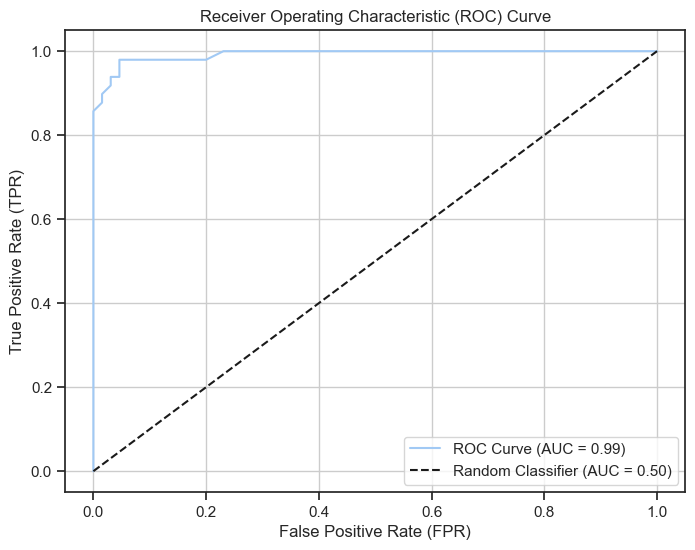

In [15]:
y_test_binary = [int(entry[0]) for entry in np.where(y_test.to_pandas() == 'M', 1, 0)]
prediction_probs_binary = [x[1] for x in prediction_probs]

fpr, tpr, thresholds = roc_curve(y_test_binary, prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(y_test_binary, prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Bootstrapping data

In [14]:
# Iniitalize df
simulated_df = pd.DataFrame(columns = ['id', 'diagnosis'] + columns_for_model)
different_measurements = set([col[:col.rindex('_')] for col in columns_for_model])
index_val = 0

random.seed(55)
for row in cancer_dataset.iterrows():
    new_row = {'id': row[1].id, 'diagnosis': row[1].diagnosis}
    for num_samples in range(random.randint(20, 30)):
        for measurement in different_measurements:
            simulated_value = np.random.normal(row[1][measurement + '_mean'], row[1][measurement + '_se'])
            new_row[measurement + '_mean'] = max(simulated_value, 0)
            new_row[measurement + '_worst'] = max(simulated_value, 0)
        simulated_df = pd.concat([simulated_df, pd.DataFrame(new_row, index=[index_val])])
        index_val += 1

C:\Users\kevin\AppData\Local\Temp\ipykernel_13556\2849038305.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  simulated_df = pd.concat([simulated_df, pd.DataFrame(new_row, index=[index_val])])


## Comparing the bootstrapped data to the original

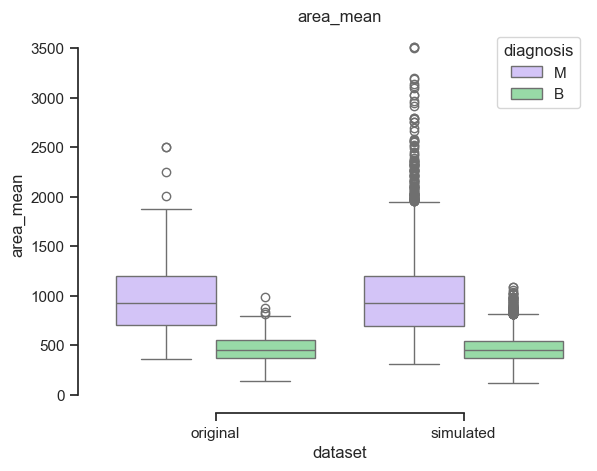

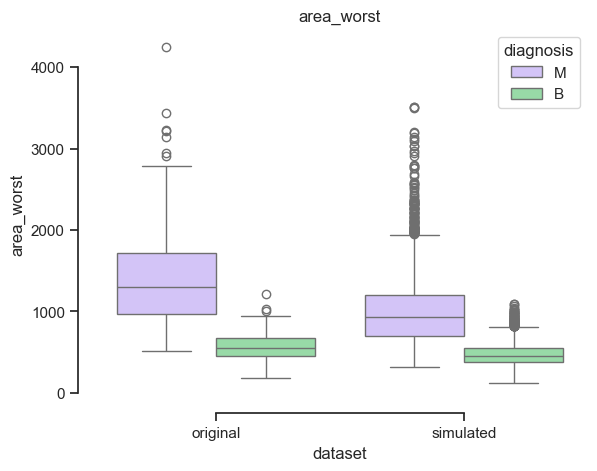

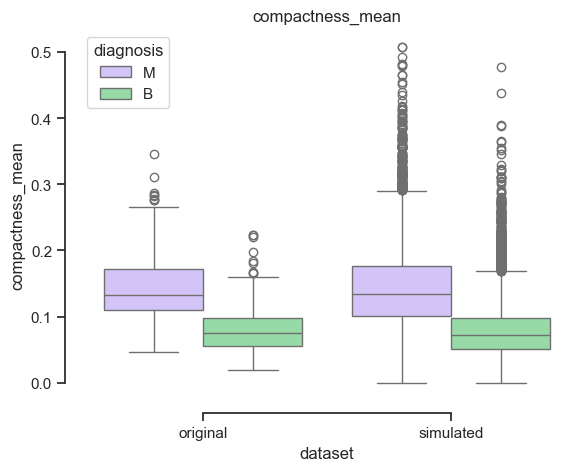

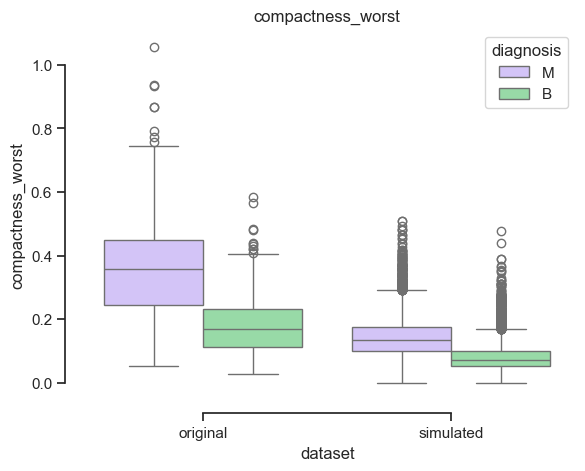

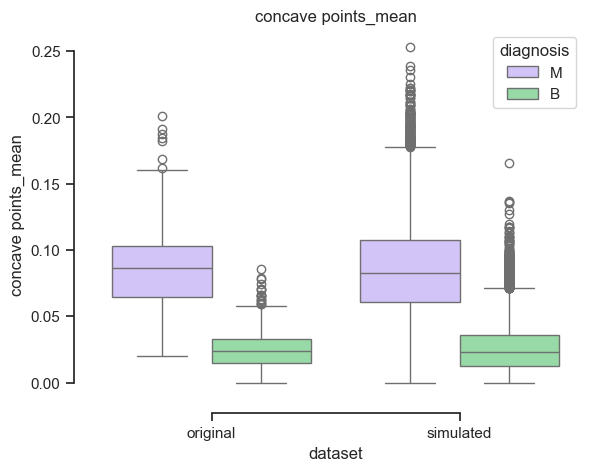

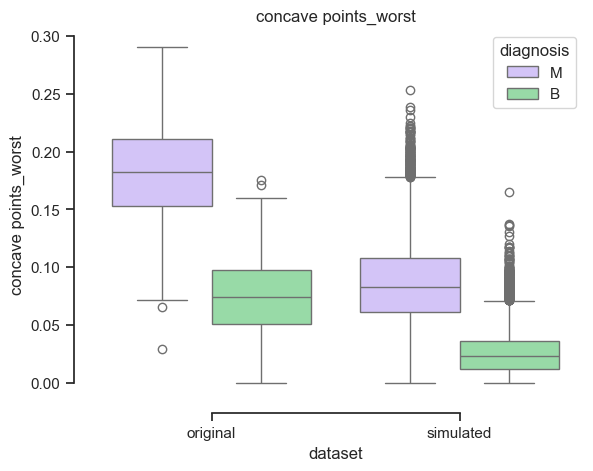

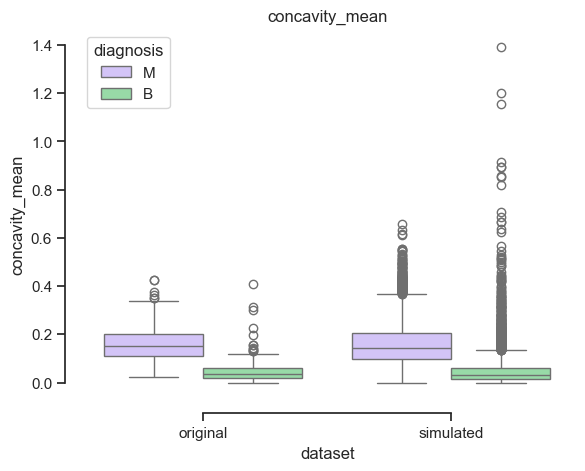

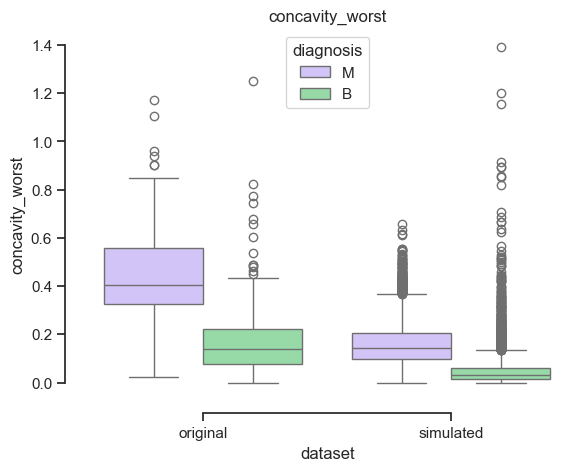

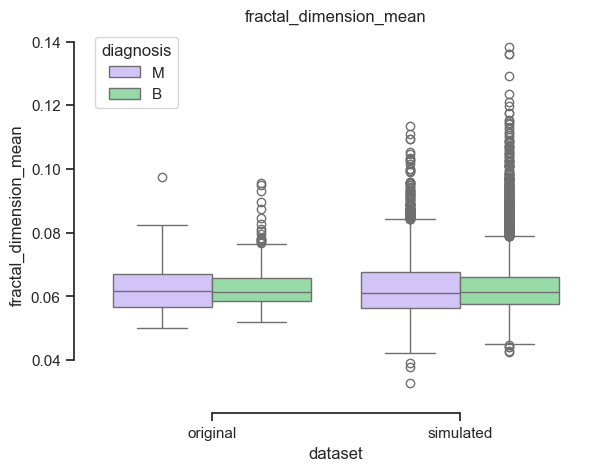

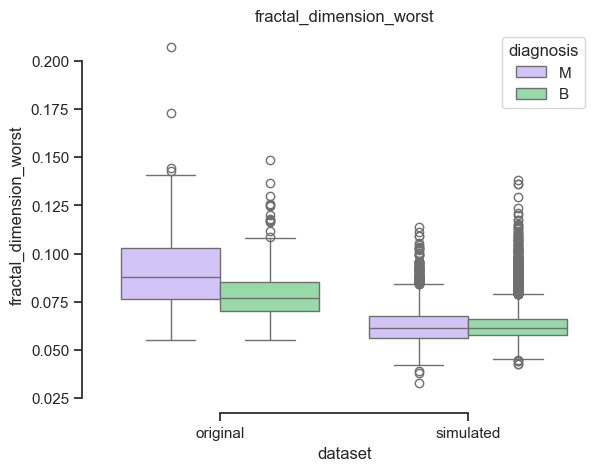

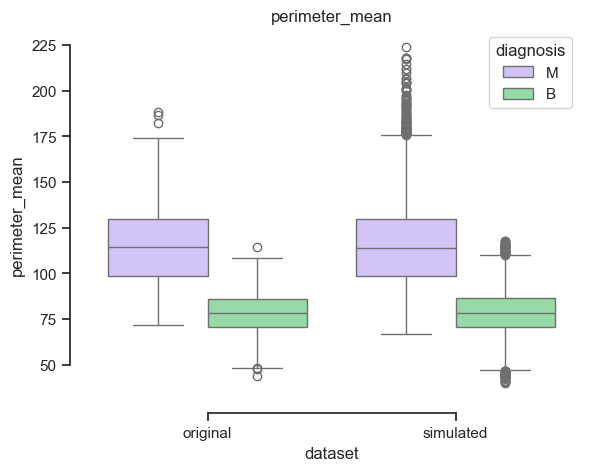

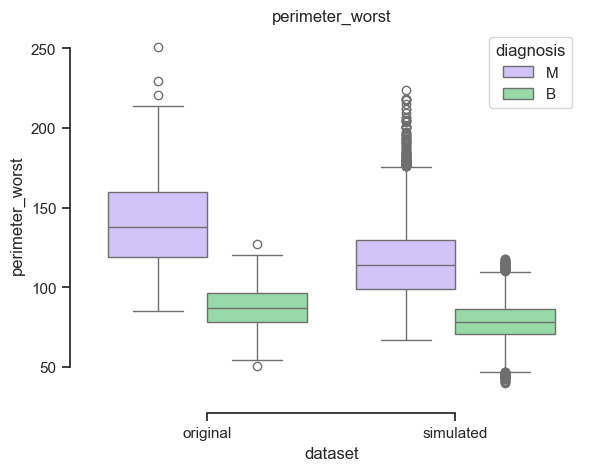

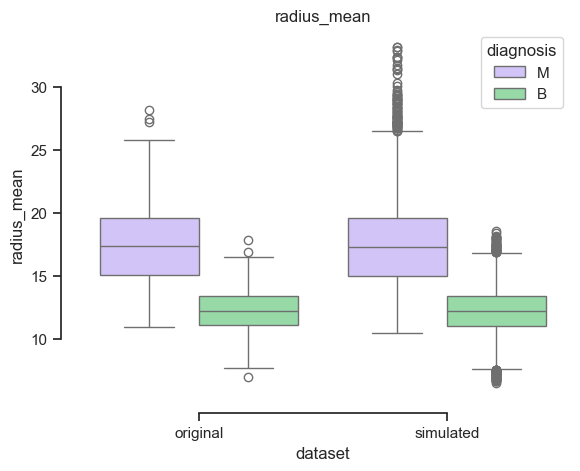

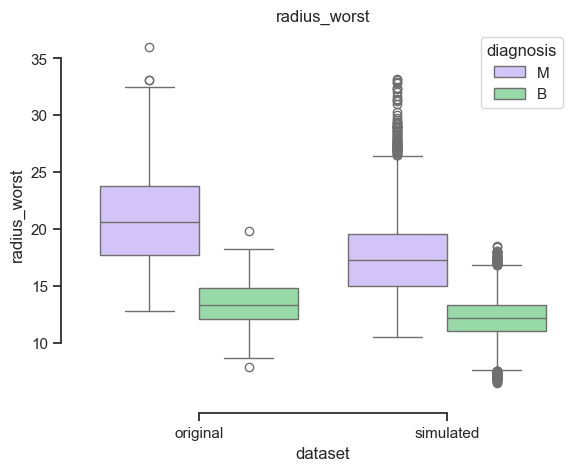

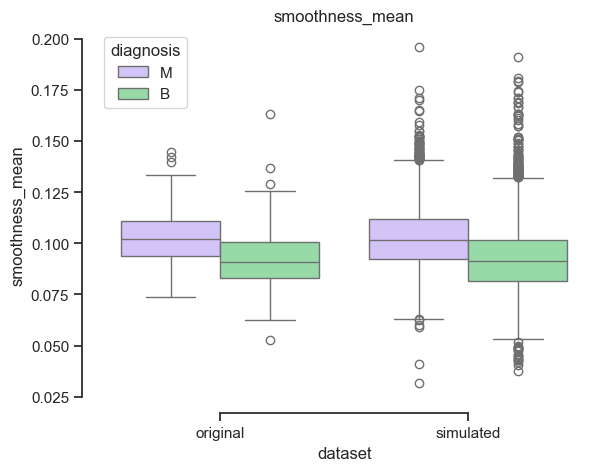

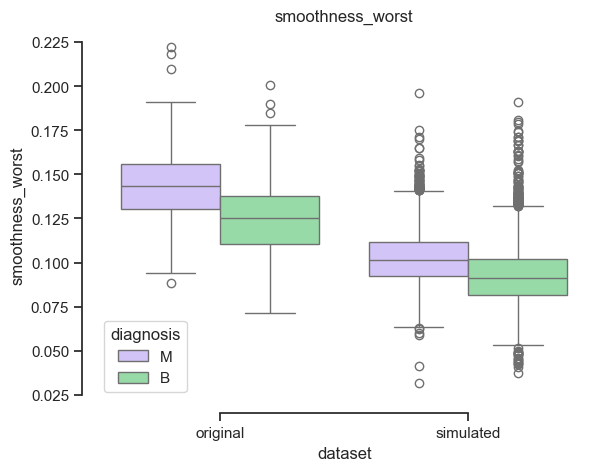

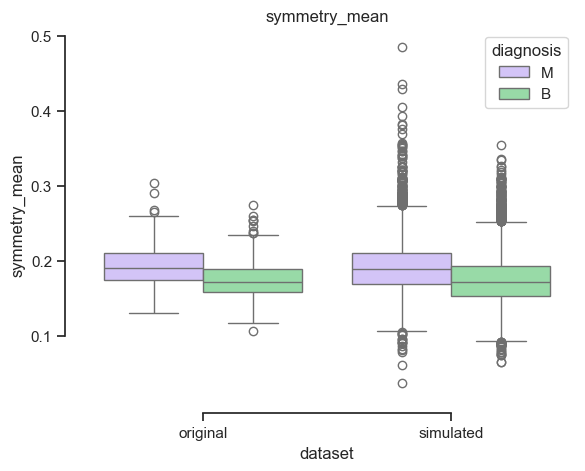

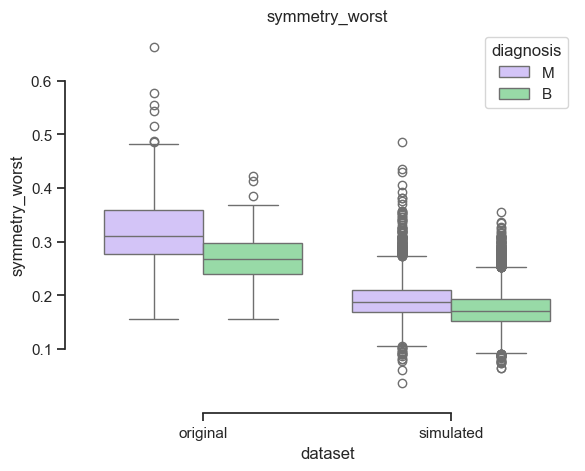

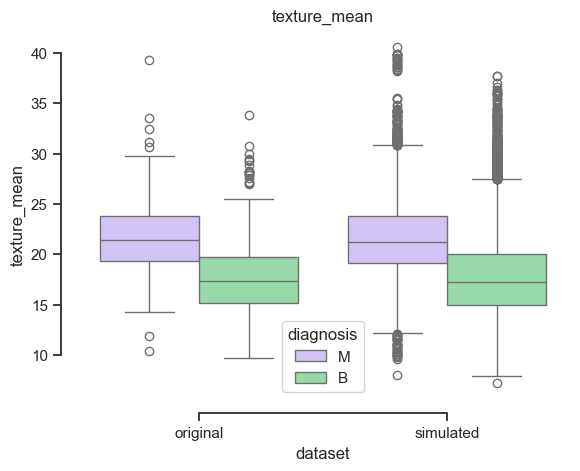

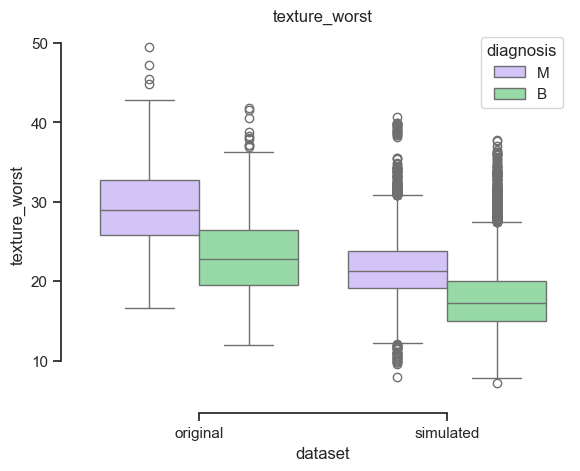

In [15]:
sns.set_theme(style="ticks", palette="pastel")

simulated_df['dataset'] = 'simulated'
cancer_dataset['dataset'] = 'original'

for col in columns_for_model:
# Draw a nested boxplot to show bills by day and time
    sns.boxplot(x="dataset", y=col,
                hue="diagnosis", palette=["m", "g"],
                data=pd.concat([cancer_dataset, simulated_df]))
    sns.despine(offset=10, trim=True)
    plt.title(f"{col}")
    plt.show()

In [18]:
test_ids = cancer_dataset.iloc[idx_test].id
simulated_df['test_group'] = np.where(simulated_df.id.isin(test_ids), 'test', 'train')
simulated_xtrain = simulated_df[simulated_df.test_group == 'train'][columns_for_model]
simulated_ytrain = simulated_df[simulated_df.test_group == 'train'].diagnosis
simulated_xtest = simulated_df[simulated_df.test_group == 'test'][columns_for_model]
simulated_ytest = simulated_df[simulated_df.test_group == 'test'].diagnosis

In [19]:
model.fit(simulated_xtrain, simulated_ytrain)
simulated_predictions = model.predict(simulated_xtest)
simulated_prediction_probs = model.predict_proba(simulated_xtest)

accuracy_score(simulated_ytest, simulated_predictions, normalize=True, sample_weight=None)

print(f'Accuracy: {accuracy_score(simulated_ytest, simulated_predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(model, simulated_xtrain, simulated_ytrain, cv=5))}')

Accuracy: 0.9333099333099333
Avg CV accuracy: 0.9338491167816277


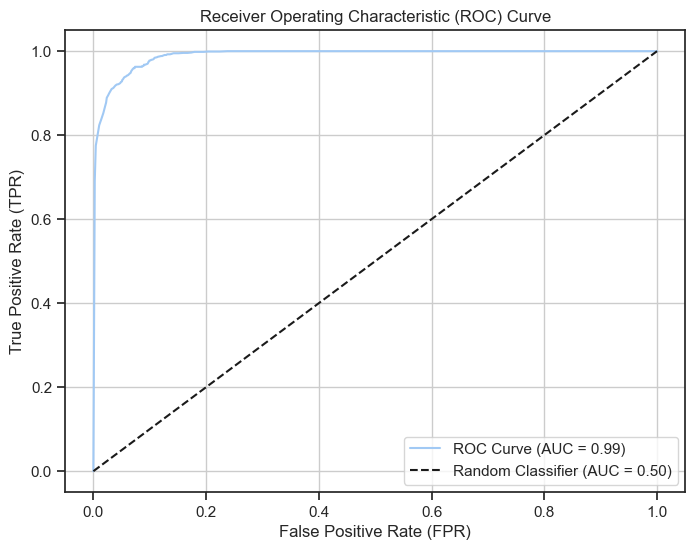

In [20]:
simulated_ytest_binary = [int(entry) for entry in np.where(simulated_ytest == 'M', 1, 0)]
simulated_prediction_probs_binary = [x[1] for x in simulated_prediction_probs]

fpr, tpr, thresholds = roc_curve(simulated_ytest_binary, simulated_prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(simulated_ytest_binary, simulated_prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Trying again with simplified model

In [28]:
simplified_model_columns = [col for col in input_columns if '_mean' in col]

random.seed(55)
simplified_model = RandomForestClassifier(n_estimators=100, random_state=55)
simplified_model.fit(X_train[:, simplified_model_columns], y_train)
simplified_predictions = simplified_model.predict(X_test[:, simplified_model_columns],)
simplified_prediction_probs = simplified_model.predict_proba(X_test[:, simplified_model_columns])

print(f'Accuracy: {accuracy_score(y_test.to_pandas(), simplified_predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(simplified_model, X_train[:, simplified_model_columns], y_train.to_pandas(), cv=5))}')

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9385964912280702


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Avg CV accuracy: 0.9384615384615385


C:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


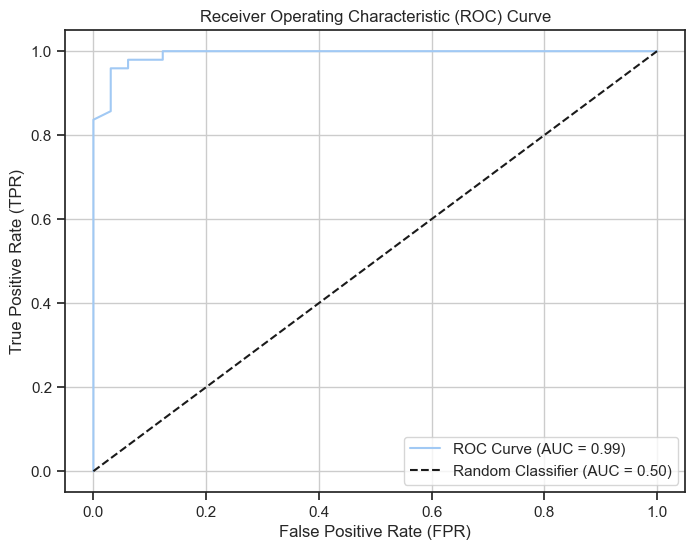

In [29]:
y_test_binary = [int(entry[0]) for entry in np.where(y_test.to_pandas() == 'M', 1, 0)]
simplified_prediction_probs_binary = [x[1] for x in simplified_prediction_probs]

fpr, tpr, thresholds = roc_curve(y_test_binary, simplified_prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(y_test_binary, simplified_prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [31]:
test_ids = cancer_dataset.iloc[idx_test].id

simulated_xtest_simplified = simulated_df[(simulated_df.id.isin(test_ids))][simplified_model_columns]
simulated_ytest = simulated_df[(simulated_df.id.isin(test_ids))].diagnosis

simulated_predictions_simplified = simplified_model.predict(simulated_xtest_simplified)
simulated_prediction_probs_simplified = simplified_model.predict_proba(simulated_xtest_simplified)

print(f'Accuracy: {accuracy_score(simulated_ytest, simulated_predictions_simplified, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(simplified_model, simulated_xtest_simplified, simulated_ytest, cv=5))}')

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9371709371709371
Avg CV accuracy: 0.9357765239108315


## Exporting the boostrapped data

In [22]:
simulated_df.tail()

,id,diagnosis,area_mean,area_worst,compactness_mean,compactness_worst,concave points_mean,concave points_worst,concavity_mean,concavity_worst,fractal_dimension_mean,fractal_dimension_worst,perimeter_mean,perimeter_worst,radius_mean,radius_worst,smoothness_mean,smoothness_worst,symmetry_mean,symmetry_worst,texture_mean,texture_worst,dataset
14272,92751,B,164.130895,164.130895,0.045051,0.045051,0.0,0.0,0.0,0.0,0.056146,0.056146,45.892093,45.892093,7.789452,7.789452,0.055194,0.055194,0.170003,0.170003,24.873812,24.873812,simulated
14273,92751,B,201.310953,201.310953,0.040230,0.040230,0.0,0.0,0.0,0.0,0.057780,0.057780,50.638020,50.638020,7.861976,7.861976,0.042708,0.042708,0.164168,0.164168,26.296062,26.296062,simulated
14274,92751,B,171.792439,171.792439,0.045287,0.045287,0.0,0.0,0.0,0.0,0.060658,0.060658,46.727636,46.727636,7.306300,7.306300,0.059848,0.059848,0.153404,0.153404,25.429555,25.429555,simulated
14275,92751,B,168.373681,168.373681,0.036249,0.036249,0.0,0.0,0.0,0.0,0.058009,0.058009,51.212123,51.212123,8.162515,8.162515,0.057474,0.057474,0.101048,0.101048,27.657507,27.657507,simulated
14276,92751,B,164.705799,164.705799,0.039615,0.039615,0.0,0.0,0.0,0.0,0.060972,0.060972,45.776702,45.776702,7.811408,7.811408,0.047629,0.047629,0.189983,0.189983,23.555447,23.555447,simulated


In [28]:
simulated_df.drop('dataset', axis=1, inplace=False).to_csv('simulated_data.csv', index=False)